In [11]:
import json
import uuid
import random
import pandas as pd
import time
import matplotlib.pyplot as plt
import math
import codecs

import numpy as np
import codecs
import operator
import json
import uuid
import random
import pandas as pd
import time
import matplotlib.pyplot as plt
import math
import copy


In [12]:
def score(a, b):
    x1 = a.split(" ")
    x2 = b.split(" ")
    total1 = 0
    total2 = 0
    matrix1 = []
    for i in range(len(x1)):
        matrix1.append(0)
    matrix2 = []
    for i in range(len(x2)):
        matrix2.append(0)
          
    for i in range(len(x1)):    
        index = 0
        score = 0
        for j in range(i, len(x1)):    
            for k in range(index, len(x2)):       
                if x1[j] in x2[k] or x2[k] in x1[j]:
                    grade = (len(x1)-j)*(len(x2)-k)
                    score += grade
                    index = k+1
                    matrix1[j]=matrix1[j]+len(x1)-i
                    break     
        total1 += score
        
    for i in range(len(x2)):
        index = 0
        score = 0
        
        for j in range(i, len(x2)):  
            for k in range(index, len(x1)):
                if x2[j] in x1[k] or x1[k] in x2[j]:
                    grade = (len(x2)-j)*(len(x1)-k)
                    score += grade
                    index = k+1
                    matrix2[j]=matrix2[j]+len(x2)-i
                    break
        
        total2 += score 
  
    argument1 = []
    argument2 = []
    if total1 == total2:
        if total1 != 0:
            temp = []+x1
            if temp.reverse() == x2 or x1 == x2:
                argument1 = x1
                argument2 = x1
            else:
                index = 0
                for j in range(len(x1)):
                    for k in range(index, len(x2)):
                        if x1[j] == x2[k] or x2[k] in x1[j]:
                            argument1.append(x1[j])
                            index = k+1
                            break

                temp = []

                for i in range(len(matrix1)):
                    temp.append([matrix1[i], x1[i]])

                temp.sort()

                for i in temp:
                    if i[0] != 0:
                        argument2.append(i[1]) 
        else:
            argument1 = x1
            argument2 = x1
        
    if total1 > total2: 
        index = 0
        for j in range(len(x1)):
            for k in range(index, len(x2)):
                if x1[j] == x2[k] or x2[k] in x1[j]:
                    argument1.append(x1[j])
                    index = k+1
                    break
                    
        temp = []
        
        for i in range(len(matrix1)):
            temp.append([matrix1[i], x1[i]])
        
        temp.sort()
        
        for i in temp:
            if i[0] != 0:
                argument2.append(i[1])
             
    if total1 < total2:
        index = 0
        for j in range(len(x2)):
            for k in range(index, len(x1)):
                if x2[j] == x1[k] or x1[k] in x2[j]:
                    argument1.append(x2[j])
                    index = k+1
                    break
                    
        temp = []
        
        for i in range(len(matrix2)):
            temp.append([matrix2[i], x2[i]])
        
        temp.sort()
        
        for i in temp:
            if i[0] != 0:
                argument2.append(i[1])
     
    return [total1, total2, " ".join(argument1), " ".join(argument2)] 

In [13]:
class KEDOLearning:
    def __init__(self,for_all=False,top_selection=10):
        self.raw_key_list = []
        self.raw_value_list = []
        self.key_index_class = {}
        self.value_index_class = {}
        self.index_key_class = {}
        self.index_value_class = {}
        self.key_value_mapping = {}
        self.key_class_index = {}
        self.value_class_index = {}
        self.key_value_class_index_mapping = pd.DataFrame()
        self.block_class_index = {}
        self.for_all = False
        self.block_relationship_rank = pd.DataFrame()
        self.block_index_id_list = {}
        self.top_selection = top_selection
        
        
        self.a_hit =[]
        self.h_hit =[]
        self.t_hit =[]
    
    def key_value(self, key, value):
        find_key_class = ""
        find_value_class = ""
        find_key_class_index = 0
        find_value_class_index = 0
        if key in self.raw_key_list:
            find_key_class_index = self.key_index_class[key]
            find_key_class = self.index_key_class[find_key_class_index]
            if value in self.raw_value_list:
                find_value_class_index = self.value_index_class[value]
                find_value_class = self.index_value_class[find_value_class_index]
            else:
                stop = True                 
                if len(value.split(" ")) > 1:
                    for i in range(len(self.raw_value_list)):
                        s = score(value,self.raw_value_list[i])
                        if float(s[0]) >= float(s[1]) and s[0] != 0 and len(s[3].split(" ")) > 1:
                            if float(s[0]) == float(s[1]):
                                self.raw_value_list.insert(i+1,value)
                            else:
                                self.raw_value_list.insert(i,value)
                            find_value_class = s[3]
                            if find_value_class not in self.value_class_index.keys():
                                find_value_class_index = len(self.value_class_index)
                                self.value_index_class.update({value:find_value_class_index})
                                self.index_value_class.update({find_value_class_index:find_value_class})
                                self.value_class_index.update({find_value_class:find_value_class_index})
                            else:
                                find_value_class_index = self.value_class_index[find_value_class]
                                self.value_index_class.update({value:find_value_class_index})
                            stop = False
                            break
                if stop:
                    find_value_class = value
                    find_value_class_index = len(self.value_class_index)
                    self.value_index_class.update({value:find_value_class_index})
                    self.index_value_class.update({find_value_class_index:find_value_class})
                    self.value_class_index.update({find_value_class:find_value_class_index})
        else:
            stop = True
            if len(key.split(" ")) > 1:
                for i in range(len(self.raw_key_list)):
                    s = score(key,self.raw_key_list[i])
                    if float(s[0]) >= float(s[1]) and s[0] != 0 and len(s[3].split(" ")) > 1:          
                        if float(s[0]) == float(s[1]):
                            self.raw_key_list.insert(i+1,key)
                        else:
                            self.raw_key_list.insert(i,key)
                        find_key_class = s[3] 
                        if find_key_class not in self.key_class_index.keys():
                            find_key_class_index = len(self.key_class_index)
                            self.key_index_class.update({key:find_key_class_index})
                            self.index_key_class.update({find_key_class_index:find_key_class})
                            self.key_class_index.update({find_key_class:find_key_class_index})
                        else:
                            find_key_class_index = self.key_class_index[find_key_class]
                            self.key_index_class.update({key:find_key_class_index})
                        stop = False
                        break
            if stop:
                find_key_class = key
                find_key_class_index = len(self.key_class_index)
                self.key_index_class.update({key:find_key_class_index})
                self.index_key_class.update({find_key_class_index:find_key_class})
                self.key_class_index.update({find_key_class:find_key_class_index})
            if value in self.raw_value_list:
                find_value_class_index = self.value_index_class[value]
                find_value_class = self.index_value_class[find_value_class_index]
            else:
                stop = True
                if len(value.split(" ")) > 1:
                    for i in range(len(self.raw_value_list)):
                        s = score(value,self.raw_value_list[i])
                        if float(s[0]) >= float(s[1]) and s[0] != 0 and len(s[3].split(" ")) > 1:
                            if float(s[0]) == float(s[1]):
                                self.raw_value_list.insert(i+1,value)
                            else:
                                self.raw_value_list.insert(i,value)
                            find_value_class = s[3]  
                            if find_value_class not in self.value_class_index.keys():
                                find_value_class_index = len(self.value_class_index)
                                self.value_index_class.update({value:find_value_class_index})
                                self.index_value_class.update({find_value_class_index:find_value_class})
                                self.value_class_index.update({find_value_class:find_value_class_index})
                            else:
                                find_value_class_index = self.value_class_index[find_value_class]
                                self.value_index_class.update({value:find_value_class_index})
                            stop = False
                            break
                if stop:
                    find_value_class = value
                    find_value_class_index = len(self.value_class_index)
                    self.value_index_class.update({value:find_value_class_index})
                    self.index_value_class.update({find_value_class_index:find_value_class})
                    self.value_class_index.update({find_value_class:find_value_class_index})
        if find_key_class_index in self.key_value_class_index_mapping.index and find_value_class_index in self.key_value_class_index_mapping.columns:
            if str(self.key_value_class_index_mapping.loc[find_key_class_index,find_value_class_index]) == "nan":
                self.key_value_class_index_mapping.loc[find_key_class_index,find_value_class_index] = 1
            else:
                self.key_value_class_index_mapping.loc[find_key_class_index,find_value_class_index] += 1
        else:
            self.key_value_class_index_mapping.loc[find_key_class_index,find_value_class_index] = 1
        if key in self.key_value_mapping.keys():
            if value not in self.key_value_mapping[key]:
                self.key_value_mapping[key].append(value)
        else:
            self.key_value_mapping.update({key:[value]})
        if key not in self.raw_key_list:
            self.raw_key_list.append(key)
        if value not in self.raw_value_list:
            self.raw_value_list.append(value)
        return [find_key_class_index, find_value_class_index]
    
    
    def block(self, block, ID):
        block1_class = []
        for i in block: 
            temp_input = i.split(":")
            temp = self.key_value(temp_input[0], temp_input[1])
            temp_output = [temp[0], temp[1]]
            block1_class.append(temp_output)
        stop = True
        temp_class_list = list(self.block_class_index.values())
        for i in range(len(temp_class_list)):
            if self.for_all:
                if all(x in temp_class_list[i] for x in block1_class) and len(block1_class) == len(temp_class_list[i]):
                    block_index = list(block_class_index.keys())[i]
                    ID = self.block_index_id_list[block_index]
                    stop = False
                    break
            else:
                if all(x in temp_class_list[i] for x in block1_class):
                    block_index = list(self.block_class_index.keys())[i]
                    ID = self.block_index_id_list[block_index]
                    stop = False
                    break
        if stop:
            block_index = len(self.block_class_index)
            self.block_class_index.update({block_index:block1_class})
            self.block_index_id_list.update({block_index:ID})
        return [block1_class, block_index, stop, ID]
    
    
    def rank(self, pairs, relationship):
        block_relationship_rank_copy = self.block_relationship_rank.copy()
        if len(block_relationship_rank_copy) == 0:
            self.update_rank(pairs, relationship)
            self.a_hit.append("Unknown")
            self.h_hit.append("Unknown")
            self.t_hit.append("Unknown")
            return relationship
        else:
            if all(x in list(block_relationship_rank_copy.keys()) for x in pairs) and relationship in block_relationship_rank_copy.index:
                result = block_relationship_rank_copy.loc[:,pairs[0]]
                if len(pairs) > 1:
                    for i in pairs[1:]:
                        result += block_relationship_rank_copy.loc[:,i]
                result = result.sort_values(ascending=False)
                count = 0
                top = []
                temp_number = 10000000
                for m in result.index:
                    if result[m] < temp_number:
                        temp_number = result[m]
                        count+=1
                        if count == (self.top_selection+1):
                            break
                        else:
                            top.append(m)
                    else:
                        top.append(m)
                    
                if relationship in top:
                    #2 pairs 
                    pair1 = block_relationship_rank_copy.loc[relationship,pairs[0]]
                    pair2 = block_relationship_rank_copy.loc[relationship,pairs[1]]
                    check = False
                    if pair1 == 0:
                        self.h_hit.append("False")
                        check = True
                    else:
                        xresult = block_relationship_rank_copy.loc[:,pairs[0]]
                        xresult = xresult.sort_values(ascending=False)
                        
                        count = 0
                        top = []
                        temp_number = 10000000
                        for m in xresult.index:
                            if xresult[m] < temp_number:
                                temp_number = xresult[m]
                                count+=1
                                if count == (self.top_selection+1):
                                    break
                                else:
                                    top.append(m)
                            else:
                                top.append(m)
                        if relationship not in top:
                            check = True
                            self.h_hit.append("False")
                        else:     
                            self.h_hit.append("True")
                            
                        
                    if pair2 == 0:
                        check = True
                        self.t_hit.append("False")
                    else:
                        xresult = block_relationship_rank_copy.loc[:,pairs[1]]
                        xresult = xresult.sort_values(ascending=False)
                        
                        count = 0
                        top = []
                        temp_number = 10000000
                        for m in xresult.index:
                            if xresult[m] < temp_number:
                                temp_number = xresult[m]
                                count+=1
                                if count == (self.top_selection+1):
                                    break
                                else:
                                    top.append(m)
                            else:
                                top.append(m)
                        if relationship not in top:
                            check = True
                            self.t_hit.append("False")
                        else:
                            self.t_hit.append("True")
                    
                    if check:
                        self.a_hit.append("False")
                    else:
                        self.a_hit.append("True")
                        
                        
                    self.update_rank(pairs, relationship)
                    return relationship
                else:
                    #2 pairs 
                    pair1 = block_relationship_rank_copy.loc[relationship,pairs[0]]
                    pair2 = block_relationship_rank_copy.loc[relationship,pairs[1]]
                    check = False
                    if pair1 == 0:
                        self.h_hit.append("False")
                        check = True
                    else:
                        xresult = block_relationship_rank_copy.loc[:,pairs[0]]
                        xresult = xresult.sort_values(ascending=False)
                        
                        count = 0
                        top = []
                        temp_number = 10000000
                        for m in xresult.index:
                            if xresult[m] < temp_number:
                                temp_number = xresult[m]
                                count+=1
                                if count == (self.top_selection+1):
                                    break
                                else:
                                    top.append(m)
                            else:
                                top.append(m)
                        if relationship not in top:
                            check = True
                            self.h_hit.append("False")
                        else:     
                            self.h_hit.append("True")
                            
                        
                    if pair2 == 0:
                        check = True
                        self.t_hit.append("False")
                    else:
                        xresult = block_relationship_rank_copy.loc[:,pairs[1]]
                        xresult = xresult.sort_values(ascending=False)
                        
                        count = 0
                        top = []
                        temp_number = 10000000
                        for m in xresult.index:
                            if xresult[m] < temp_number:
                                temp_number = xresult[m]
                                count+=1
                                if count == (self.top_selection+1):
                                    break
                                else:
                                    top.append(m)
                            else:
                                top.append(m)
                        if relationship not in top:
                            check = True
                            self.t_hit.append("False")
                        else:
                            self.t_hit.append("True")
                    
                    if check:
                        self.a_hit.append("False")
                    else:
                        self.a_hit.append("True")
                        
                    self.update_rank(pairs, relationship)
                    return result.keys()[0]
            else:
                self.a_hit.append("Unknown")
                self.h_hit.append("Unknown")
                self.t_hit.append("Unknown")
                self.update_rank(pairs, relationship)
                return relationship

    def update_rank(self, pairs, relationship):
        rank_score = 1/len(pairs)
        block_relationship_rank_copy = self.block_relationship_rank.copy()
        if len(block_relationship_rank_copy) == 0:
            for i in pairs:
                block_relationship_rank_copy.loc[relationship,i] = rank_score
        elif relationship not in block_relationship_rank_copy.index:
            for i in pairs:
                block_relationship_rank_copy.loc[relationship,i] = rank_score
        else:
            for i in pairs:
                if i not in block_relationship_rank_copy.columns:
                    block_relationship_rank_copy.loc[relationship,i] = rank_score
                else:
                    block_relationship_rank_copy.loc[relationship,i] += rank_score
        self.block_relationship_rank = block_relationship_rank_copy.fillna(0)
        
    def build_block_relationship(self, block1, id1, block2, id2, relationship):
        a = self.block(block1, id1)
        b = self.block(block2, id2)
        block1_index_result = a[1]
        block2_index_result = b[1]
        block1_ID = a[3]
        block2_ID = b[3]
        block1_class_list = a[0]
        block2_class_list = b[0]
        temp_list = []

        for i in block1_class_list:
            temp_pair = str(i[0])+","+str(i[1])
            if temp_pair not in temp_list:
                    temp_list.append(temp_pair)
        for j in block2_class_list:
                temp_pair = str(j[0])+","+str(j[1])
                if temp_pair not in temp_list:
                    temp_list.append(temp_pair)
        output = self.rank(temp_list, relationship)
        return output

In [14]:
def modify(input, instance):
    key_list = []
    
    while len(key_list) < instance:
        temp = []
        for i in range(0,5):
            temp.append(random.randint(0,1))
        temp2 = []
        for i in range(0,5):
            if i ==2 :
                temp2.append(input[i])
            else:
                if temp[i-1] == 1:
                    temp2.append(input[i])
        string = " ".join(temp2)
        if string not in key_list:
            key_list.append(string)
    return key_list



In [29]:
def data(range_n, instance):
    
    k1 = []
    for i in range(range_n):
        key = str(uuid.uuid4()).split("-") 
        k1.append(modify(key,instance))

    v1 = []
    for i in range(range_n):
        key = str(uuid.uuid4()).split("-") 
        v1.append(modify(key,instance))

    k2 = []
    for i in range(range_n):
        key = str(uuid.uuid4()).split("-") 
        k2.append(modify(key,instance))

    v2 = []
    for i in range(range_n):
        key = str(uuid.uuid4()).split("-") 
        v2.append(modify(key,instance))
        
    entity_set = set()
    relation_set = set()

    h = []

    for i in range(0,range_n):
        temp = []
        for j in k1[i]:
            for l in v1[i]:
                temp.append(j+":"+l)
                entity_set.add(j+":"+l)
        h.append(temp)

    t = []

    for i in range(0,range_n):
        temp = []
        for j in k2[i]:
            for l in v2[i]:
                temp.append(j+":"+l)
                entity_set.add(j+":"+l)
        t.append(temp)

    triple_list = []
    
    for i in range(len(h)):
        for j in range(len(t)):
            relation = "relation" + str(i)+ "," + str(j)
            relation_set.add(relation)
            for k in h[i]:
                for l in t[j]:
                    triple_list.append([k,l,relation])

    return entity_set, relation_set, triple_list

In [26]:
def graph(info,name,top, n_c, n_i):
    plt.rcParams["figure.figsize"] = (100,30)
    fig = plt.figure()
    
    index1 = []

    for i in range(len(info)):
        index1.append(i)
    
    plt.rcParams["figure.figsize"] = (100,30)

    plt.scatter(index1,info)

    plt.xlabel('Time(Number) Series')

    plt.ylabel('Result')
    
    plt.title(name+": Predication vs. Real")
    
    fig.savefig(str(n_c)+"-"+str(n_i)+"-"+str(len(info))+"-"+name+"-"+str(top)+'.png')

In [17]:
def distanceL2(h,r,t):
    #为方便求梯度，去掉sqrt
    #sum of the square of a list of id(head + relation - tail)
    return np.sum(np.square(h + r - t))

In [18]:
def distanceL1(h,r,t):
    #sum of a list of |id (head + relation - tail)|
    return np.sum(np.fabs(h+r-t))

In [19]:
# a list of h,r,t and get the norm distance of h+r-t
def distance(h,r,t):
    h = np.array(h)
    r = np.array(r)
    t = np.array(t)
    s=h+r-t
    return np.linalg.norm(s)

In [20]:
class TransE:
    def __init__(self,entity_set, relation_set, triple_list,
                 embedding_dim=50, learning_rate=0.01, margin=1,L1=True, nbatches = 400):
        self.embedding_dim = embedding_dim
        self.learning_rate = learning_rate
        self.margin = margin
        self.entity = entity_set
        self.relation = relation_set
        self.triple_list = triple_list
        self.L1=L1
        self.nbatches=nbatches

        self.loss = 0

    def emb_initialize(self):
        relation_dict = {}
        entity_dict = {}
        
        #relation is a unique list of relation id
        for relation in self.relation:
            #100 dimentions
            #a random unique list of 100 values of -0.6 ~ 0.6
            r_emb_temp = np.random.uniform(-6/math.sqrt(self.embedding_dim) ,
                                           6/math.sqrt(self.embedding_dim) ,
                                           self.embedding_dim)
            
            #the norm2 of the r_emb_temp, the value is different in each run
            #np.linalg.norm(r_emb_temp,ord=2)
            
            #purpose: ?
            #a dict relation_dict will keep the 
            # id (relation) : a list of 100 values of -0.6 ~ 0.6 / norm2 of r_emb_temp
            relation_dict[relation] = r_emb_temp / np.linalg.norm(r_emb_temp,ord=2)

        for entity in self.entity:
            #100 dimentions
            #a random unique list of 100 values of -0.6 ~ 0.6
            e_emb_temp = np.random.uniform(-6/math.sqrt(self.embedding_dim) ,
                                        6/math.sqrt(self.embedding_dim) ,
                                        self.embedding_dim)
            #purpose: ?
            #a dict entity_dict will keep the 
            # id (entity) : a list of 100 values of -0.6 ~ 0.6 / norm2 of r_emb_temp
            entity_dict[entity] = e_emb_temp / np.linalg.norm(e_emb_temp,ord=2)

        self.relation = relation_dict
        self.entity = entity_dict

    def train(self, epochs):
        #nbatches = 400
        #the triple of the (h,r,t)
        batch_size = len(self.triple_list) // self.nbatches
        #print("batch size: ", batch_size)
        for epoch in range(epochs):
            start = time.time()
            self.loss = 0
            
            # 400 batches = 400 triples in the sample
            for k in range(self.nbatches):
                # Sbatch:list
                Sbatch = random.sample(self.triple_list, batch_size)
                Tbatch = []

                for triple in Sbatch:
                    # make one negative case (h or t) for each triple
                    corrupted_triple = self.Corrupt(triple)
                    if (triple, corrupted_triple) not in Tbatch:
                        Tbatch.append((triple, corrupted_triple))
                
                #update a list 400 of (positive_triple, negative_triple)
                self.update_embeddings(Tbatch)


            end = time.time()
            print("epoch: ", epoch , "cost time: %s"%(round((end - start),3)))
            # see the error in each epoch, trend is decreasing
            #print("loss: ", self.loss)
        return self.entity, self.relation

    #one triple of (h,r,t)
    #change the head or tail
    def Corrupt(self,triple):
        corrupted_triple = copy.deepcopy(triple)
        seed = random.random()
        if seed > 0.5:
            rand_head = triple[0]
            while rand_head == triple[0]:
                rand_head = random.sample(self.entity.keys(),1)[0]
            corrupted_triple[0]=rand_head

        else:
            rand_tail = triple[1]
            while rand_tail == triple[1]:
                rand_tail = random.sample(self.entity.keys(), 1)[0]
            corrupted_triple[1] = rand_tail
        return corrupted_triple

    def update_embeddings(self, Tbatch):
        copy_entity = copy.deepcopy(self.entity)
        copy_relation = copy.deepcopy(self.relation)

        for triple, corrupted_triple in Tbatch:
            # positive case
            # head : a list of 100 values of -0.6 ~ 0.6 / norm2 of r_emb_temp
            # tail : a list of 100 values of -0.6 ~ 0.6 / norm2 of r_emb_temp
            # relation : a list of 100 values of -0.6 ~ 0.6 / norm2 of r_emb_temp
            h_correct_update = copy_entity[triple[0]]
            t_correct_update = copy_entity[triple[1]]
            relation_update = copy_relation[triple[2]]
            
            # negative case
            # head : a list of 100 values of -0.6 ~ 0.6 / norm2 of r_emb_temp
            # tail : a list of 100 values of -0.6 ~ 0.6 / norm2 of r_emb_temp
            h_corrupt_update = copy_entity[corrupted_triple[0]]
            t_corrupt_update = copy_entity[corrupted_triple[1]]

            # 取原始的vector计算梯度
            # positive case
            # head : a list of 100 values of -0.6 ~ 0.6 / norm2 of r_emb_temp
            # tail : a list of 100 values of -0.6 ~ 0.6 / norm2 of r_emb_temp
            # relation : a list of 100 values of -0.6 ~ 0.6 / norm2 of r_emb_temp
            h_correct = self.entity[triple[0]]
            t_correct = self.entity[triple[1]]
            relation = self.relation[triple[2]]

            # negative case
            # head : a list of 100 values of -0.6 ~ 0.6 / norm2 of r_emb_temp
            # tail : a list of 100 values of -0.6 ~ 0.6 / norm2 of r_emb_temp
            h_corrupt = self.entity[corrupted_triple[0]]
            t_corrupt = self.entity[corrupted_triple[1]]

            
            if self.L1:
                # distance L1 for three elements, each has
                # a list of 100 values of -0.6 ~ 0.6 / norm2 of r_emb_temp
                
                # distance for the positive case
                dist_correct = distanceL1(h_correct, relation, t_correct)
                # distance for the negative case
                dist_corrupt = distanceL1(h_corrupt, relation, t_corrupt)
            else:
                # distance L2
                dist_correct = distanceL2(h_correct, relation, t_correct)
                dist_corrupt = distanceL2(h_corrupt, relation, t_corrupt)
            
            # get the error value between positive and nagative case
            err = self.hinge_loss(dist_correct, dist_corrupt)
            
            # err > 0 ??? what's that mean?
            # so if err = 0, means the distance between positive and negative case is acceptable
            # acceptable distance = positive - negative <= -1
            if err > 0:
                self.loss += err
                # a list of 100 values of -0.6 ~ 0.6 / norm2 of r_emb_temp
                # 100 h_positive + 100 r_positive - 100 t_positive
                grad_pos = 2 * (h_correct + relation - t_correct)
                grad_neg = 2 * (h_corrupt + relation - t_corrupt)

                if self.L1:
                    # 100 
                    for i in range(len(grad_pos)):
                        if (grad_pos[i] > 0):
                            # true
                            grad_pos[i] = 1
                        else:
                            # false
                            grad_pos[i] = -1

                    for i in range(len(grad_neg)):
                        if (grad_neg[i] > 0):
                            grad_neg[i] = 1
                        else:
                            grad_neg[i] = -1

                # grad_pos = a list of 1 and -1
                h_correct_update -= self.learning_rate * grad_pos
                t_correct_update -= (-1) * self.learning_rate * grad_pos

                if triple[0] == corrupted_triple[0]:  
                    # because h is not changed
                    h_correct_update -= (-1) * self.learning_rate * grad_neg
                    t_corrupt_update -= self.learning_rate * grad_neg

                elif triple[1] == corrupted_triple[1]:  
                    # because t is not changed
                    h_corrupt_update -= (-1) * self.learning_rate * grad_neg
                    t_correct_update -= self.learning_rate * grad_neg

                #grad_pos
                #grad_neg
                # relation will be updated by the grad, to match with the learning process
                relation_update -= self.learning_rate*grad_pos
                relation_update -= (-1)*self.learning_rate*grad_neg


        #batch norm
        for i in copy_entity.keys():
            # update the a list of 100 values of -0.6 ~ 0.6 / norm2 of r_emb_temp
            # based on the np.linalg.norm of a list of 100 values of -0.6 ~ 0.6 / norm2 of r_emb_temp
            # h_correct_update
            # t_correct_update
            # are updated based on the above funtion
            copy_entity[i] /= np.linalg.norm(copy_entity[i])
        for i in copy_relation.keys():
            copy_relation[i] /= np.linalg.norm(copy_relation[i])

        # update the dict of entity and relation
        # the 100 list of each dict element will be updated
        self.entity = copy_entity
        self.relation = copy_relation

    # max of 0 and 1+distance of positive and negative case
    # 0 ~ ??
    # the purpose of margin: ? 
    def hinge_loss(self,dist_correct,dist_corrupt):
        return max(0,dist_correct-dist_corrupt+self.margin)




In [21]:
class Test:
    def __init__(self,entity_dict,relation_dict,test_triple,train_triple,isFit = True,top=10):
        self.entity_dict = entity_dict
        self.relation_dict = relation_dict
        self.test_triple = test_triple
        self.train_triple = train_triple
        self.isFit = isFit
        self.top = top

        self.h_hits10 = 0
        self.t_hits10 = 0
        self.a_hits10 = 0
        self.mean_rank = 0

        self.relation_hits10 = 0
        self.relation_mean_rank = 0

    def rank(self):
        h_hits = 0
        t_hits = 0
        a_hits = 0
        rank_sum = 0
        step = 1
        
        for triple in self.test_triple:
            #for each triple in test data,
            # create the rank of head
            # create the rank of tail
            rank_head_dict = {}
            rank_tail_dict = {}
            
            #entity_dict = id : embedded matrix - 100 
            #entity = id of entity
            for entity in self.entity_dict.keys():
                # [id of head, tail, relation]
                # the id of head is selected from the entity_dict
                # realtion and tail are selected from test data
                
                # indexed head -> test tail, test relation
                # only use the indexed entity for head
                corrupted_head = [entity,triple[1],triple[2]]
                if self.isFit:
                    # if the corruputed case is not in the train data
                    if corrupted_head not in self.train_triple:
                        # get the existing embedding matrix for h, r, t
                        h_emb = self.entity_dict[corrupted_head[0]]
                        r_emb = self.relation_dict[corrupted_head[2]]
                        t_emb = self.entity_dict[corrupted_head[1]]
                        #distance between embedding matrix of h,r,t
                        rank_head_dict[tuple(corrupted_head)]=distance(h_emb,r_emb,t_emb)
                else:
                    h_emb = self.entity_dict[corrupted_head[0]]
                    r_emb = self.relation_dict[corrupted_head[2]]
                    t_emb = self.entity_dict[corrupted_head[1]]
                    rank_head_dict[tuple(corrupted_head)] = distance(h_emb, r_emb, t_emb)
                
                # indexed tail -> test head, test relation
                # only use the indexed entity for tail
                corrupted_tail = [triple[0],entity,triple[2]]
                if self.isFit:
                    # if the corruputed case is not in the train data
                    if corrupted_tail not in self.train_triple:
                        h_emb = self.entity_dict[corrupted_tail[0]]
                        r_emb = self.relation_dict[corrupted_tail[2]]
                        t_emb = self.entity_dict[corrupted_tail[1]]
                        rank_tail_dict[tuple(corrupted_tail)] = distance(h_emb, r_emb, t_emb)
                else:
                    h_emb = self.entity_dict[corrupted_tail[0]]
                    r_emb = self.relation_dict[corrupted_tail[2]]
                    t_emb = self.entity_dict[corrupted_tail[1]]
                    rank_tail_dict[tuple(corrupted_tail)] = distance(h_emb, r_emb, t_emb)
            
            # sort based on the value 
            # find the minimal value of distance
            
            # for finding the proper head for specific test tail and test relation
            rank_head_sorted = sorted(rank_head_dict.items(),key = operator.itemgetter(1))
            # find the proper tail for specific test head and test relation
            rank_tail_sorted = sorted(rank_tail_dict.items(),key = operator.itemgetter(1))

            #rank_sum and hits
            check = False
            
            for i in range(len(rank_head_sorted)):
                # see if top 10 items with the minimal distance matched with
                # the specific head
                if triple[0] == rank_head_sorted[i][0][0]:
                    if i<self.top:
                        # if find it within top 10, then hit + 1
                        h_hits += 1
                        check = True
                    # when can find the matched item
                    rank_sum = rank_sum + i + 1
                    break

            for i in range(len(rank_tail_sorted)):
                # see if top 10 items with the minimal distance matched with
                # the specific tail
                if triple[1] == rank_tail_sorted[i][0][1]:
                    if i<self.top:
                        t_hits += 1
                        check = True
                    rank_sum = rank_sum + i + 1
                    break
                    
            if check:
                a_hits+=1

        #hits is how many triple in test data can find the matched item in top 10
        self.a_hits10 = a_hits / len(self.test_triple)
        self.h_hits10 = h_hits / (len(self.test_triple))
        self.t_hits10 = t_hits / (len(self.test_triple))
        self.mean_rank = rank_sum / (2*len(self.test_triple))

    def relation_rank(self):
        hits = 0
        rank_sum = 0
        step = 1

        for triple in self.test_triple:
            rank_dict = {}
            for r in self.relation_dict.keys():
                corrupted_relation = (triple[0],triple[1],r)
                if self.isFit and corrupted_relation in self.train_triple:
                    continue
                h_emb = self.entity_dict[corrupted_relation[0]]
                r_emb = self.relation_dict[corrupted_relation[2]]
                t_emb = self.entity_dict[corrupted_relation[1]]
                rank_dict[r]=distance(h_emb, r_emb, t_emb)

            rank_sorted = sorted(rank_dict.items(),key = operator.itemgetter(1))

            rank = 1
            for i in rank_sorted:
                if triple[2] == i[0]:
                    break
                rank += 1
            if rank<self.top:
                hits += 1
            rank_sum = rank_sum + rank + 1


        self.relation_hits10 = hits / len(self.test_triple)
        self.relation_mean_rank = rank_sum / len(self.test_triple)

In [30]:
def KLtest(relation_list, top, n_c, n_i):   
    
    count = []   
    AI = KEDOLearning(top_selection=top)

    for i in range(len(relation_list)):
        temp = relation_list[i]
        rel = AI.build_block_relationship([temp[0]], str(uuid.uuid4()), [temp[1]], str(uuid.uuid4()), temp[2])

        if rel != temp[2]:
            count.append("False")
        else:
            #print(rel)
            count.append("True")
    graph(AI.a_hit,"T-H",top, n_c, n_i)
    graph(AI.h_hit,"H",top, n_c, n_i)
    graph(AI.t_hit,"T",top, n_c, n_i)
    graph(count,"R",top, n_c, n_i)
    
    first = int(2*len(relation_list)/3)

    return [len(relation_list),top, n_c, n_i, 
            AI.h_hit.count("True")/len(relation_list),AI.h_hit[0:first].count("True")/len(relation_list[0:first]),AI.h_hit[first:].count("True")/len(relation_list[first:]),
            AI.t_hit.count("True")/len(relation_list),AI.t_hit[0:first].count("True")/len(relation_list[0:first]),AI.t_hit[first:].count("True")/len(relation_list[first:]),
            AI.a_hit.count("True")/len(relation_list),AI.a_hit[0:first].count("True")/len(relation_list[0:first]),AI.a_hit[first:].count("True")/len(relation_list[first:]),
            count.count("True")/len(count)]
    

    

In [33]:
def TransEandKL(entity_set, relation_set, relation_list,top_input, n_c, n_i):  
    first = int(2*len(relation_list)/3)
    train_triple = relation_list[0:first]
    test_triple = relation_list[first:]
    
    transE = TransE(entity_set, relation_set, train_triple,embedding_dim=50, learning_rate=0.01, margin=1,L1=True, nbatches=400)
    transE.emb_initialize()
    global_entity_dict, global_relation_dict = transE.train(epochs=1000)
    test = KLtest(global_entity_dict,global_relation_dict,test_triple,train_triple,isFit=False,top=top_input)
    test.rank()
    test.relation_rank()
    
    return [len(relation_list),top_input, n_c, n_i,
            test.h_hits10,
            test.t_hits10,
            test.a_hits10,
            test.relation_hits10]
    

epoch:  0 cost time: 1.842
epoch:  1 cost time: 1.524
epoch:  2 cost time: 1.37
epoch:  3 cost time: 1.331
epoch:  4 cost time: 1.307
epoch:  5 cost time: 1.295
epoch:  6 cost time: 1.275
epoch:  7 cost time: 1.273
epoch:  8 cost time: 1.282
epoch:  9 cost time: 1.286
epoch:  10 cost time: 1.275
epoch:  11 cost time: 1.267
epoch:  12 cost time: 1.279
epoch:  13 cost time: 1.256
epoch:  14 cost time: 1.269
epoch:  15 cost time: 1.269
epoch:  16 cost time: 1.285
epoch:  17 cost time: 1.272
epoch:  18 cost time: 1.282
epoch:  19 cost time: 1.287
epoch:  20 cost time: 1.28
epoch:  21 cost time: 1.26
epoch:  22 cost time: 1.28
epoch:  23 cost time: 1.283
epoch:  24 cost time: 1.274
epoch:  25 cost time: 1.329
epoch:  26 cost time: 1.254
epoch:  27 cost time: 1.262
epoch:  28 cost time: 1.251
epoch:  29 cost time: 1.264
epoch:  30 cost time: 1.259
epoch:  31 cost time: 1.255
epoch:  32 cost time: 1.265
epoch:  33 cost time: 1.293
epoch:  34 cost time: 1.261
epoch:  35 cost time: 1.257
epoch:

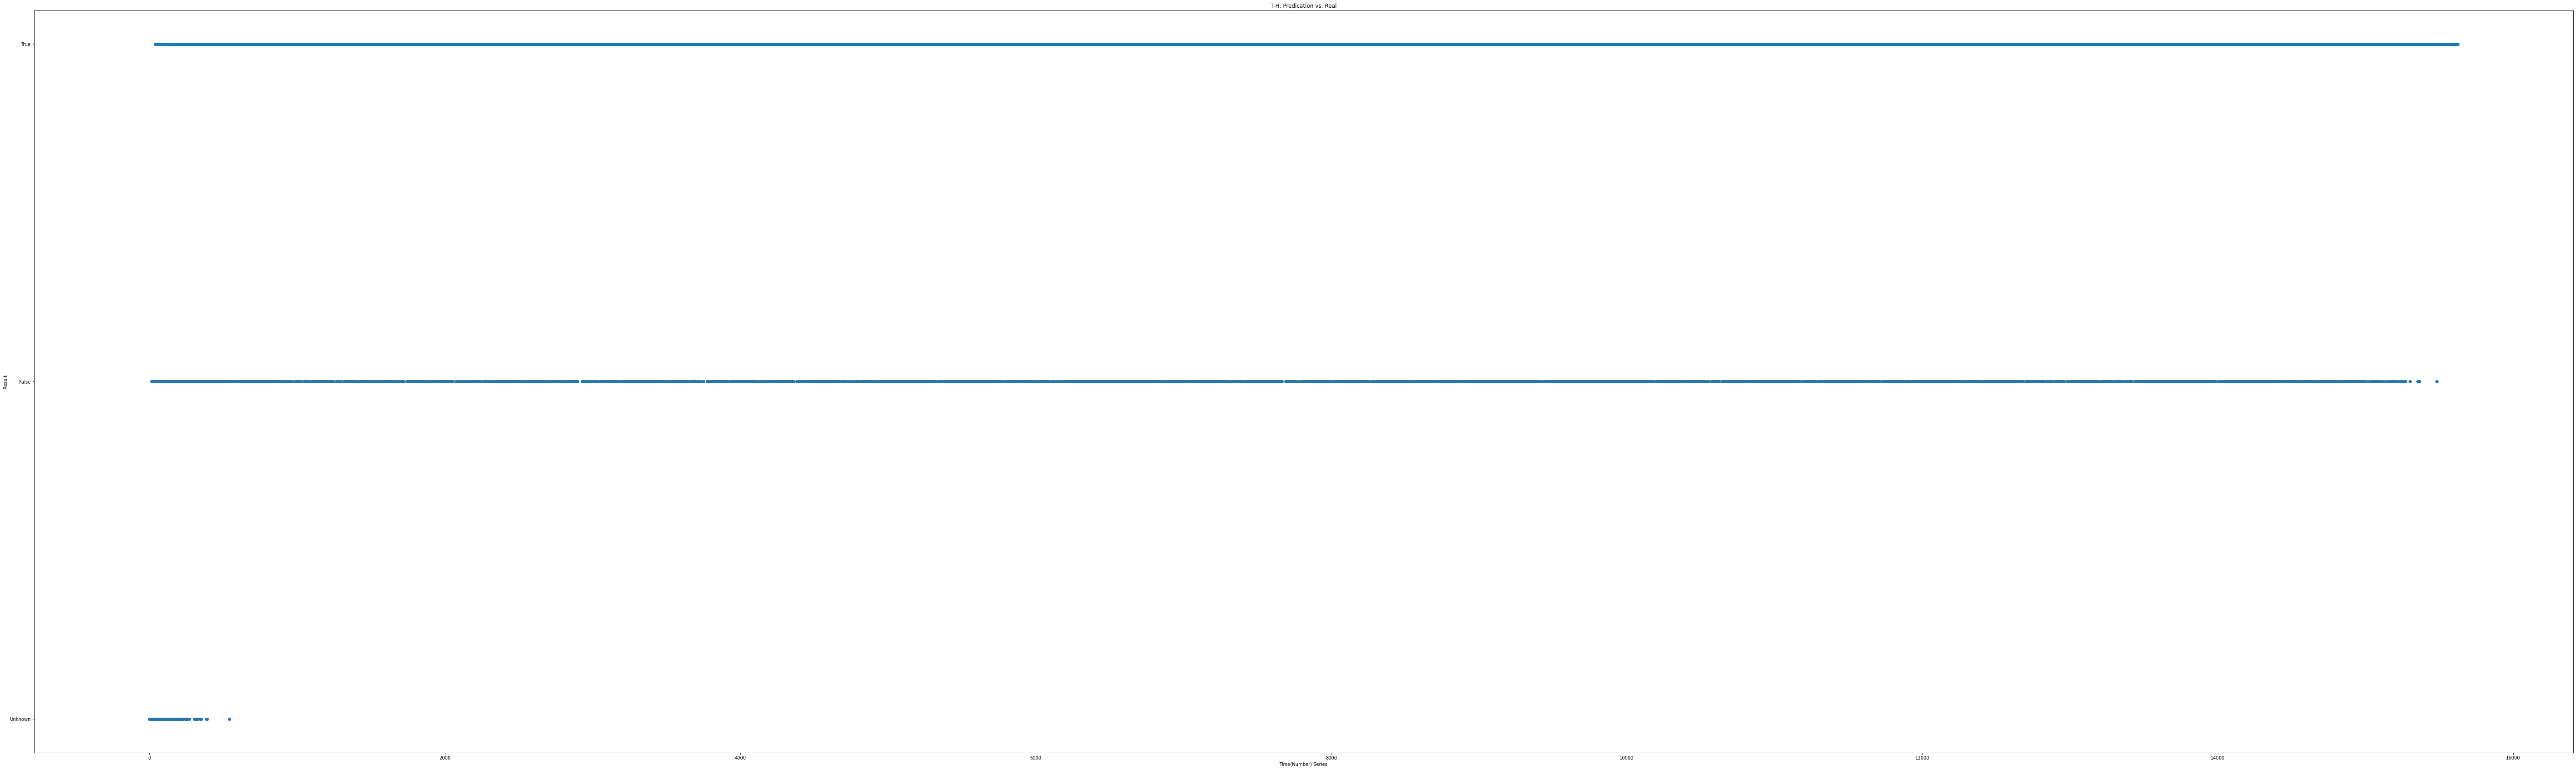

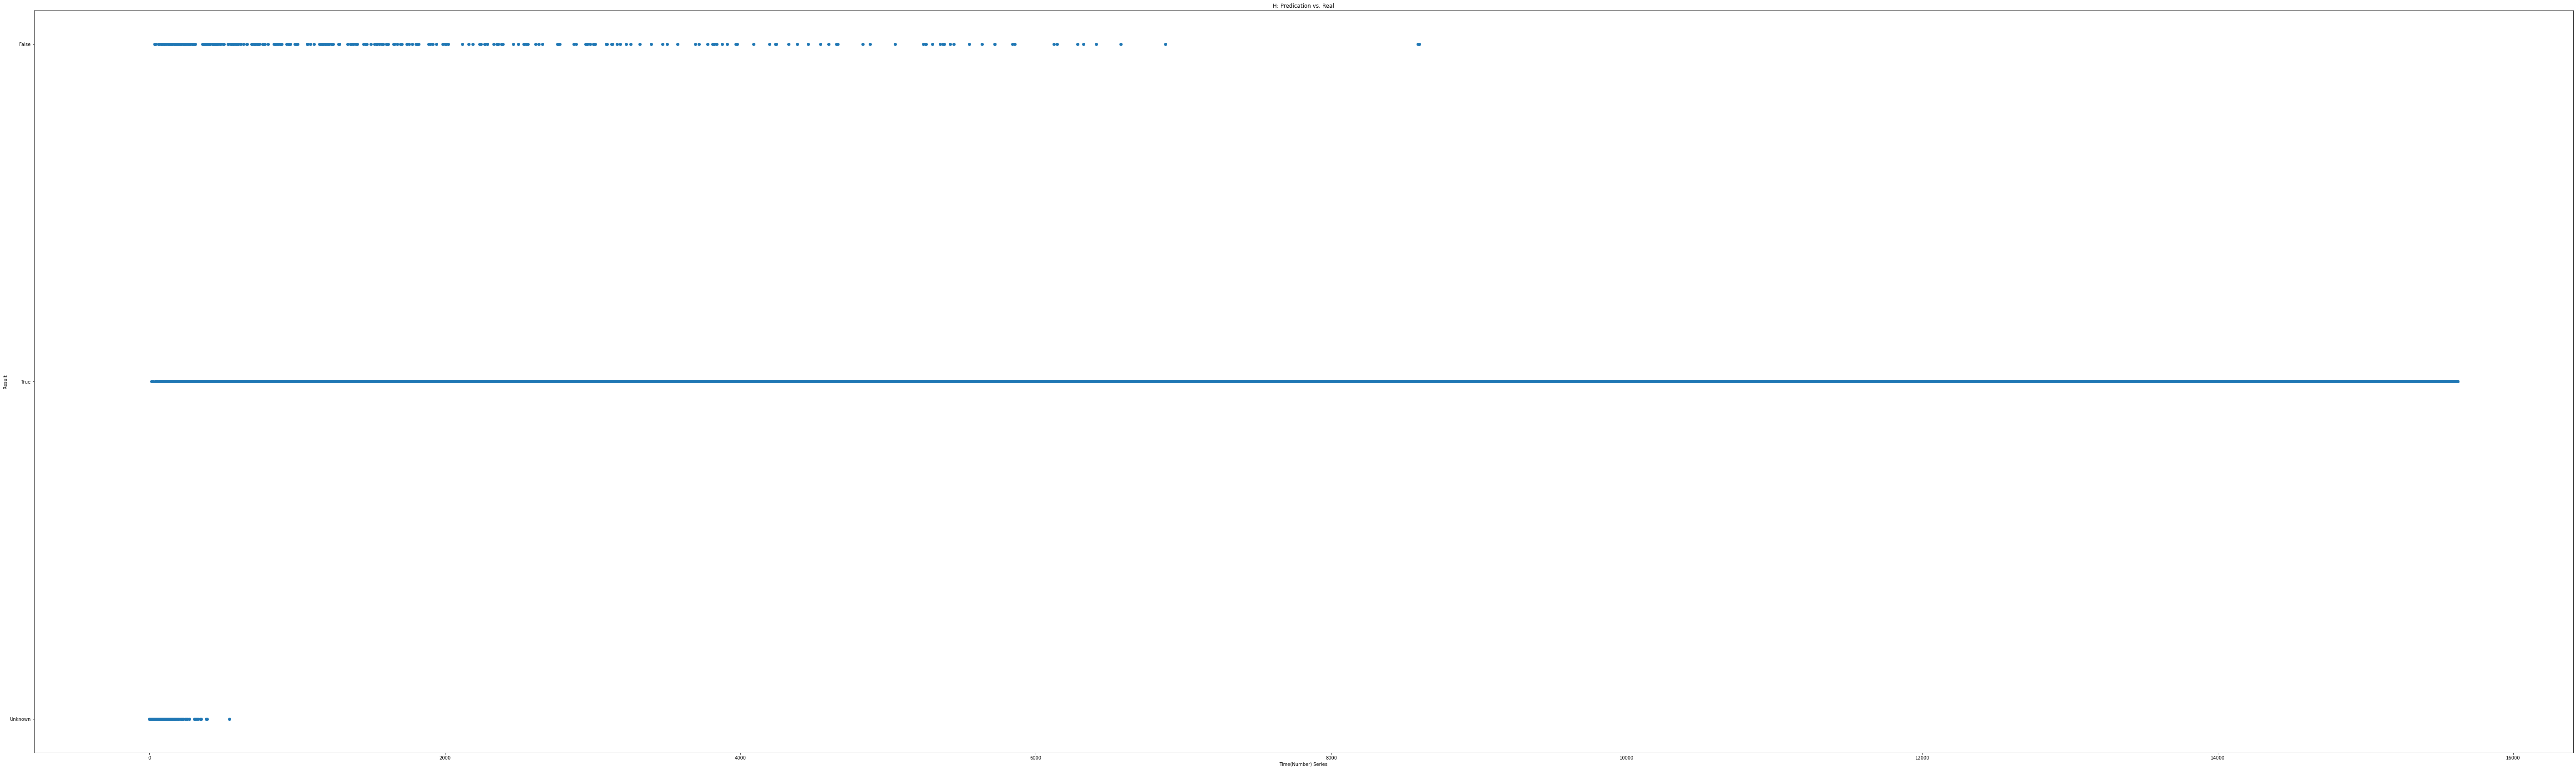

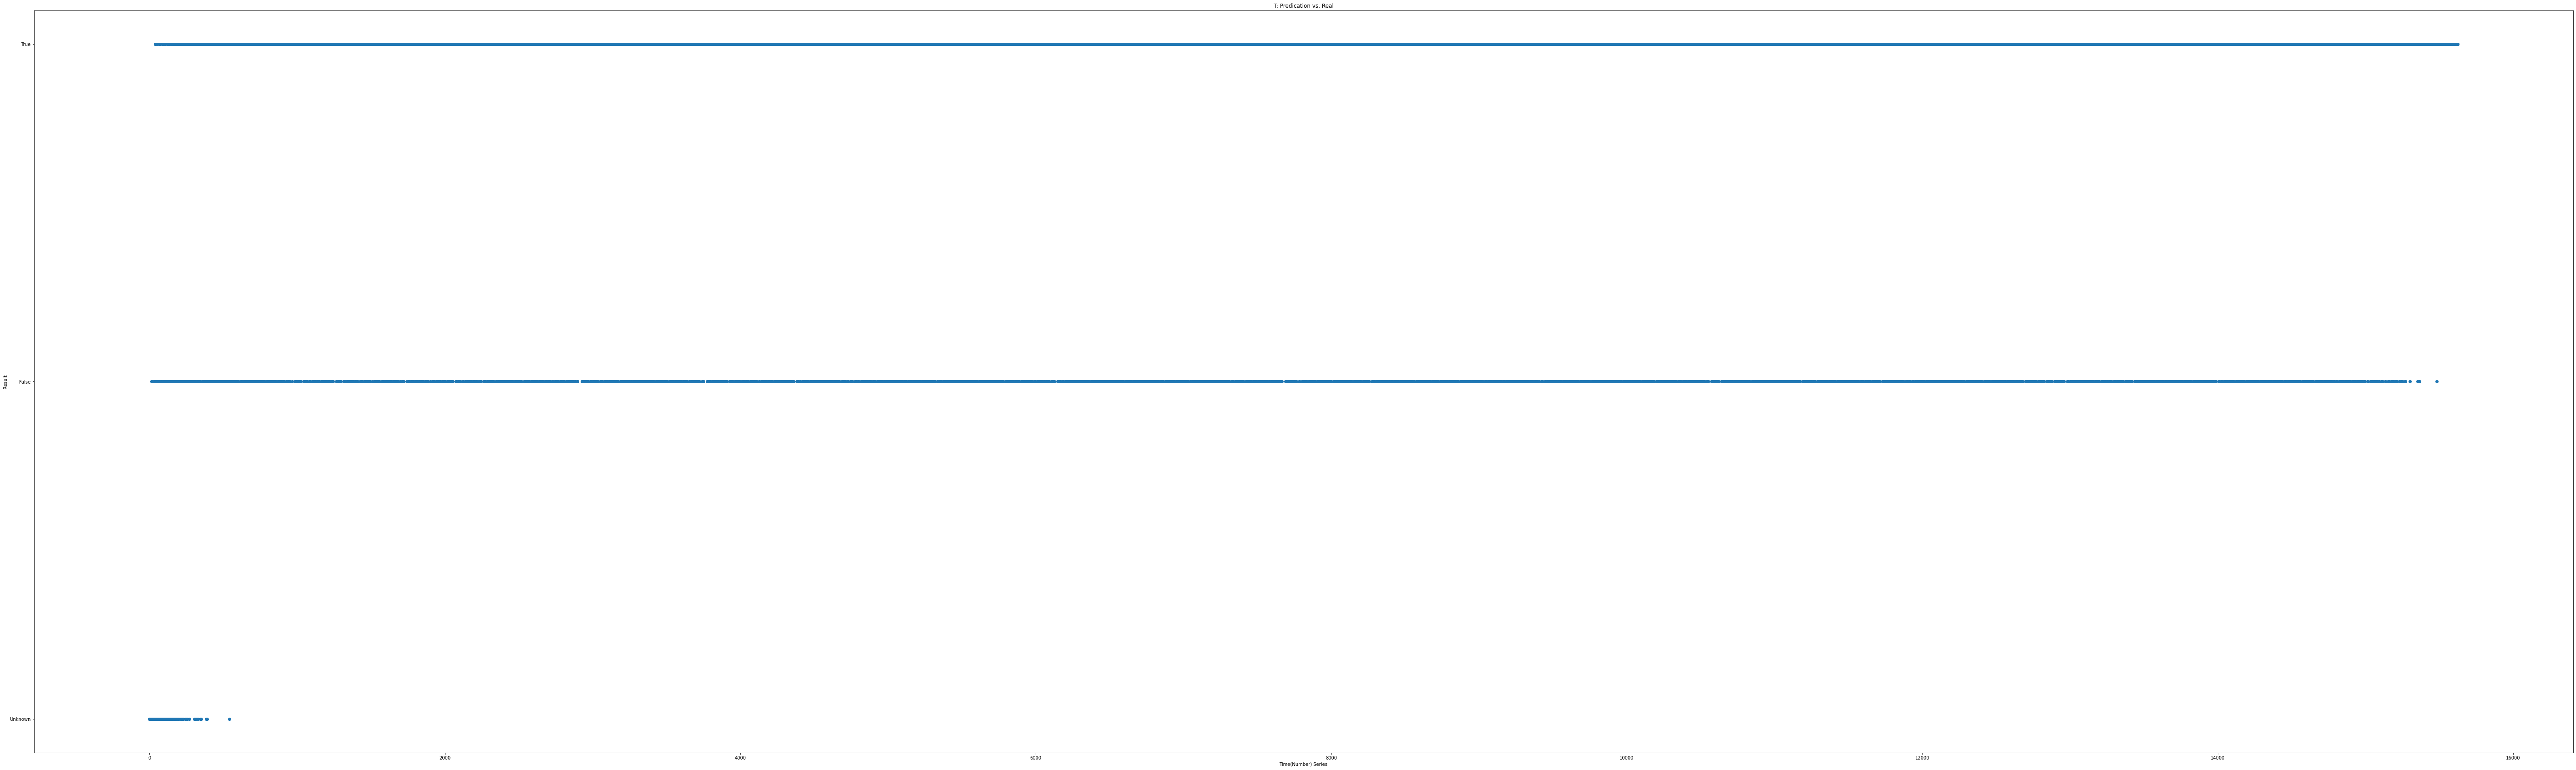

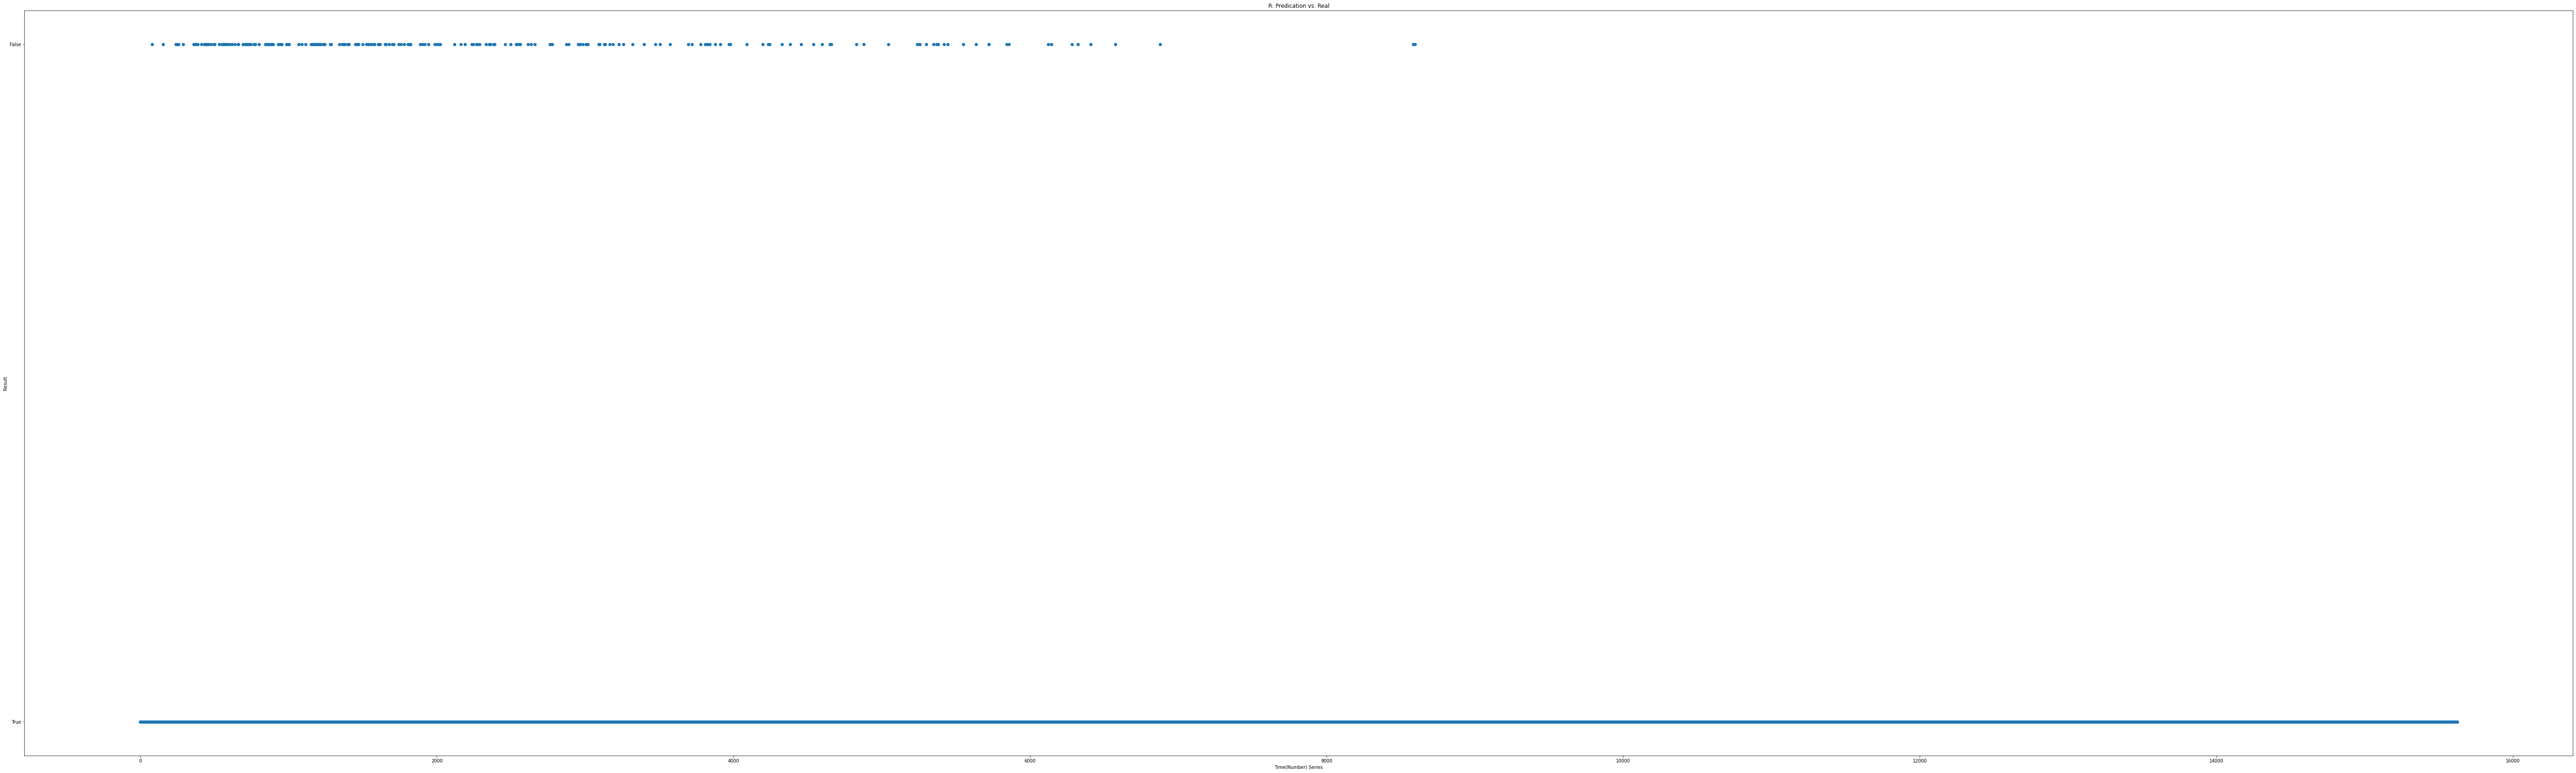

In [32]:
if __name__=='__main__':
    
    for i in [5,10,15,20]:
        
        entity_set, relation_set, triple_list = data(i,5)
            
        for x in range(100):
            random.shuffle(triple_list)
            
        for j in [3,6,9]:
            
            with open("output.txt", "a") as f1:
                for e in KLtest(triple_list, j, i, 5):
                    f1.write(str(e) + "\t")
                f1.write("\n")
            with open("output.txt", "a") as f1:    
                for e in TransEandKL(entity_set, relation_set, triple_list, j, i, 5):
                    f1.write(str(e) + "\t")
                f1.write("\n")
            
    for i in [6,7,8,9,10,11]:
        entity_set, relation_set, triple_list = data(5,i)
            
        for x in range(100):
            random.shuffle(triple_list)
            
        for j in [3,6,9]:
            
            
            with open("output.txt", "a") as f1:
                for e in KLtest(triple_list, j, 5, i):
                    f1.write(str(e) + "\t")
                f1.write("\n")
            with open("output.txt", "a") as f1:    
                for e in TransEandKL(entity_set, relation_set, triple_list, j, 5, i):
                    f1.write(str(e) + "\t")
                f1.write("\n")  
            
            
            
